Max: 1.0117141625884103 Mean: 1.0116460055355347
Max: 1.0870298324481764 Mean: 1.080211034172043
Max: 1.3493053180394796 Mean: 1.2999192577284544
Max: 5.33284670529907 Mean: 3.6479368134674757


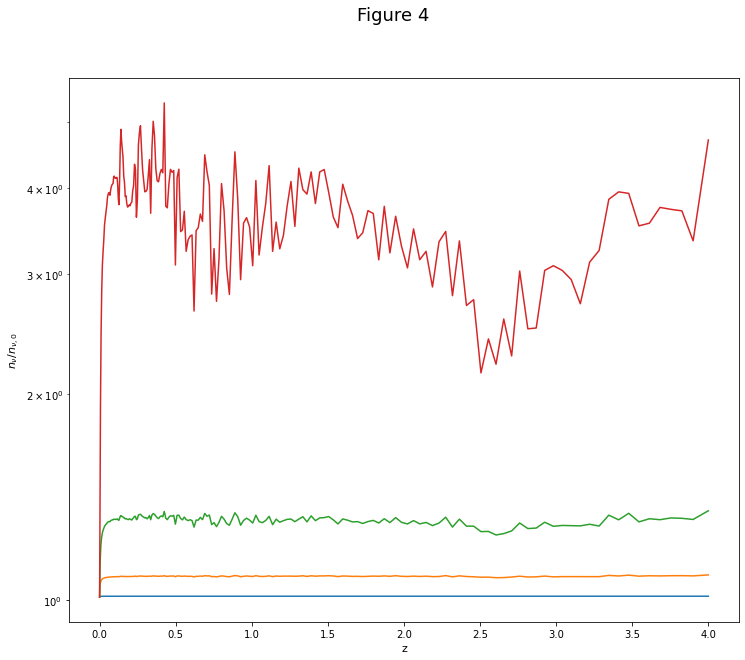

In [15]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my
import shared.control_center as CC

def n_nu_of_redshift(m_sim_eV, m_nu_eV):

    # load initial and final velocity
    Ns = np.arange(CC.NR_OF_NEUTRINOS, dtype=int)  # Nr. of neutrinos
    sim = np.array([np.load(f'neutrino_vectors/nu_{Nr+1}.npy') for Nr in Ns])
    u_all = sim[:,:,3:6]  # (10000, 100, 3) shape, ndim = 3
    
    # Convert to momenta; (10000, 100) shape, ndim = 2
    p, _ = fct.u_to_p_eV(u_all, m_sim_eV, m_nu_eV)

    zeds = CC.ZEDS

    n_nus = np.zeros(len(zeds))
    for i, z in enumerate(zeds):

        # Calculate number density.
        n_nus[i] = fct.number_density(p[:,0], p[:,i], z).value

    np.save(f'neutrino_data/number_densities_at_z_{m_nu_eV.value}eV.npy', n_nus)


z_array = np.linspace(CC.Z_START, CC.Z_STOP, CC.Z_AMOUNT+1)

fig, ax = plt.subplots(1,1, figsize=(12,10))
fig.suptitle(
    'Figure 4', fontsize=18)

masses = np.array([
    0.01, 0.05,
    0.1, 
    0.3
    ])*unit.eV
for j, m in enumerate(masses):
    n_nu_of_redshift(CC.NU_MASS, m)

    n_nus = np.load(f'neutrino_data/number_densities_at_z_{m.value}eV.npy')
    print('Max:', np.max(n_nus/CC.N0),'Mean:', np.mean(n_nus/CC.N0))

    ax.semilogy(CC.ZEDS, n_nus/CC.N0)

ax.set_xlabel('z')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')

plt.savefig('check_plots/figure_4.pdf')
plt.show()

#! x-axis doesn't fully start at zero, because number density is 0.0 there.

## Momentum behaviour

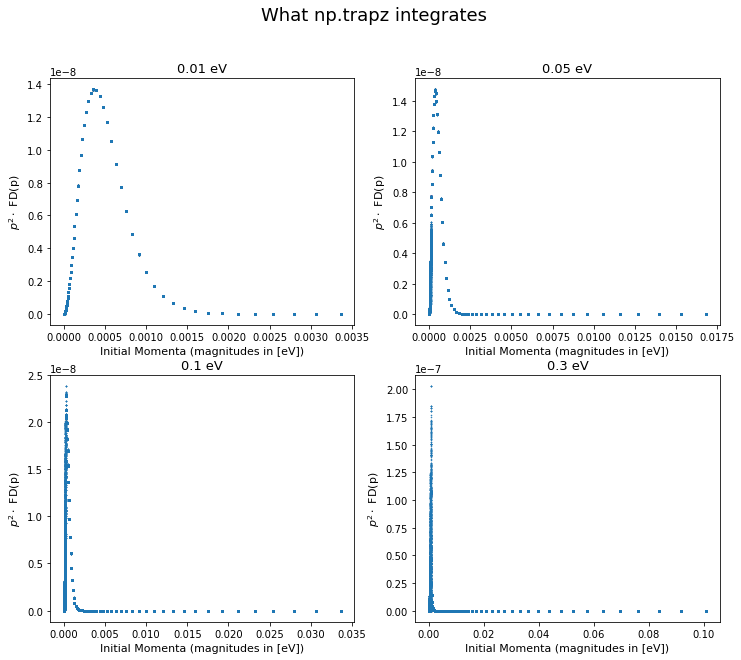

In [9]:
def momentum_shape(m_sim_eV, m_nu_eV):

    # load initial and final velocity
    Ns = np.arange(CC.NR_OF_NEUTRINOS, dtype=int)  # Nr. of neutrinos
    u0 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[0][3:6] for Nr in Ns]
    u1 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[-1][3:6] for Nr in Ns]
    u0, u1 = np.array(u0), np.array(u1)

    # Get momenta.
    p0, _ = fct.u_to_p_eV(u0, m_sim_eV, m_nu_eV)
    p1, _ = fct.u_to_p_eV(u1, m_sim_eV, m_nu_eV)

    #NOTE: trapz integral method needs sorted (ascending) arrays
    order = p0.argsort()
    p0_sort, p1_sort = p0[order], p1[order]

    # precomputed factors
    FDvals = fct.Fermi_Dirac(p1_sort, CC.Z_STOP)  #! needs p in [eV]

    r<eturn p0_sort.value, FDvals


fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle(
    'What np.trapz integrates', fontsize=18)

masses = np.array([0.01, 0.05, 0.1, 0.3])*unit.eV
for j, m in enumerate(masses):
    p0_sort, FDvals = momentum_shape(CC.NU_MASS, m)
    y = p0_sort**2. * FDvals

    i = 0
    if j in (2,3):
        i = 1
        j -= 2

    axs[i,j].scatter(p0_sort, y, s=0.3)
    axs[i,j].set_title(f'{m.value} eV')
    axs[i,j].set_xlabel('Initial Momenta (magnitudes in [eV])')
    axs[i,j].set_ylabel(r'$p^2 \cdot$ FD(p)')

plt.savefig('check_plots/figure_4_momenta.pdf')
plt.show()